### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Convertir cada DataFrame en lista de diccionarios
ventas = tienda.to_dict('records')
ventas2 = tienda2.to_dict('records')
ventas3 = tienda3.to_dict('records')
ventas4 = tienda4.to_dict('records')

# Calcular ingreso total
def ingreso_total(ventas):
    total = 0
    for venta in ventas:
        precio = venta['Precio']
        total += precio
    return total

In [3]:
# Ingresos de cada tienda
ingresos = [
            ('Tienda 1', ingreso_total(ventas)),
            ('Tienda 2',ingreso_total(ventas2)),
            ('Tienda 3',ingreso_total(ventas3)),
            ('Tienda 4',ingreso_total(ventas4))
            ]
for tienda, ingreso in ingresos:
  print(f'El ingreso de la {tienda} es: {ingreso}')

El ingreso de la Tienda 1 es: 1150880400.0
El ingreso de la Tienda 2 es: 1116343500.0
El ingreso de la Tienda 3 es: 1098019600.0
El ingreso de la Tienda 4 es: 1038375700.0


# 2. Ventas por categoría

In [4]:
# Calcular ventas por categoría
def ventas_por_categoria(ventas):
    categorias = {}
    for venta in ventas:
        categoria = venta['Categoría del Producto']
        if categoria in categorias:
            categorias[categoria] += 1
        else:
            categorias[categoria] = 1
    return categorias

# Ventas por categoría
categorias = [ventas_por_categoria(ventas), ventas_por_categoria(ventas2), ventas_por_categoria(ventas3), ventas_por_categoria(ventas4)]

In [5]:
# Categorías más populares
def top_categorias(categorias, tienda):
    print(f"\n Categorías más populares en {tienda}:")
    ordenadas = sorted(categorias.items(), key=lambda x: x[1], reverse=True)
    for categoria, cantidad in ordenadas:
        print(f"{categoria}: {cantidad} ventas")

tiendas_categorias = [('Tienda 1', categorias[0]), ('Tienda 2', categorias[1]), ('Tienda 3', categorias[2]), ('Tienda 4', categorias[3])]

for tienda, categorias in tiendas_categorias:
    top_categorias(categorias, tienda)


 Categorías más populares en Tienda 1:
Muebles: 465 ventas
Electrónicos: 448 ventas
Juguetes: 324 ventas
Electrodomésticos: 312 ventas
Deportes y diversión: 284 ventas
Instrumentos musicales: 182 ventas
Libros: 173 ventas
Artículos para el hogar: 171 ventas

 Categorías más populares en Tienda 2:
Muebles: 442 ventas
Electrónicos: 422 ventas
Juguetes: 313 ventas
Electrodomésticos: 305 ventas
Deportes y diversión: 275 ventas
Instrumentos musicales: 224 ventas
Libros: 197 ventas
Artículos para el hogar: 181 ventas

 Categorías más populares en Tienda 3:
Muebles: 499 ventas
Electrónicos: 451 ventas
Juguetes: 315 ventas
Electrodomésticos: 278 ventas
Deportes y diversión: 277 ventas
Libros: 185 ventas
Instrumentos musicales: 177 ventas
Artículos para el hogar: 177 ventas

 Categorías más populares en Tienda 4:
Muebles: 480 ventas
Electrónicos: 451 ventas
Juguetes: 338 ventas
Deportes y diversión: 277 ventas
Electrodomésticos: 254 ventas
Artículos para el hogar: 201 ventas
Libros: 187 ventas

# 3. Calificación promedio de la tienda


In [6]:
# Cálculo de la calificación promedio de la tienda
def promedio_calificacion(ventas):
    total = 0
    cantidad = 0
    for venta in ventas:
        calificacion = venta['Calificación']
        total += calificacion
        cantidad += 1
    return total / cantidad if cantidad > 0 else 0

In [7]:
# Calcular promedio por tienda
promedios = [
    ("Tienda 1", promedio_calificacion(ventas)),
    ("Tienda 2", promedio_calificacion(ventas2)),
    ("Tienda 3", promedio_calificacion(ventas3)),
    ("Tienda 4", promedio_calificacion(ventas4))
]

# Mostrar resultados
for tienda, promedio in promedios:
    print(f"{tienda}: {promedio:.2f} estrellas promedio")

Tienda 1: 3.98 estrellas promedio
Tienda 2: 4.04 estrellas promedio
Tienda 3: 4.05 estrellas promedio
Tienda 4: 4.00 estrellas promedio


# 4. Productos más y menos vendidos

In [8]:
# Contar ventas por productos
def ventas_por_producto(ventas):
    productos = {}
    for venta in ventas:
        producto = venta['Producto']
        if producto in productos:
            productos[producto] += 1
        else:
            productos[producto] = 1
    return productos

# Lista de tiendas con sus productos
tiendas_productos = [
    ("Tienda 1", ventas_por_producto(ventas)),
    ("Tienda 2", ventas_por_producto(ventas2)),
    ("Tienda 3", ventas_por_producto(ventas3)),
    ("Tienda 4", ventas_por_producto(ventas4))
]

In [9]:
# Mostrar el producto más y menos vendido por tienda
for tienda, productos in tiendas_productos:
    print(f'\n {tienda}')
    ordenados = sorted(productos.items(), key=lambda x: x[1], reverse=True)

    mas_vendido = ordenados[0]
    menos_vendido = ordenados[-1]

    print(f' Más vendido: {mas_vendido[0]} ({mas_vendido[1]} ventas)')
    print(f' Menos vendido: {menos_vendido[0]} ({menos_vendido[1]} ventas)')


 Tienda 1
 Más vendido: Microondas (60 ventas)
 Menos vendido: Celular ABXY (33 ventas)

 Tienda 2
 Más vendido: Iniciando en programación (65 ventas)
 Menos vendido: Juego de mesa (32 ventas)

 Tienda 3
 Más vendido: Kit de bancas (57 ventas)
 Menos vendido: Bloques de construcción (35 ventas)

 Tienda 4
 Más vendido: Cama box (62 ventas)
 Menos vendido: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

In [10]:
# Cálculo del envio promedio por tienda
def costo_envio_promedio(ventas):
    total = 0
    cantidad = 0
    for venta in ventas:
        costo_envio = venta['Costo de envío']
        total += costo_envio
        cantidad += 1
    return total / cantidad if cantidad > 0 else 0

In [11]:
# Calcular costo de envio promedio por tienda
costo_promedios = [
    ("Tienda 1", costo_envio_promedio(ventas)),
    ("Tienda 2", costo_envio_promedio(ventas2)),
    ("Tienda 3", costo_envio_promedio(ventas3)),
    ("Tienda 4", costo_envio_promedio(ventas4))
]

# Mostrar resultados
for tienda, costo_promedio in costo_promedios:
    print(f"{tienda} tiene un costo promedio de: {costo_promedio:.2f}")

Tienda 1 tiene un costo promedio de: 26018.61
Tienda 2 tiene un costo promedio de: 25216.24
Tienda 3 tiene un costo promedio de: 24805.68
Tienda 4 tiene un costo promedio de: 23459.46


# 6. Visualización

In [12]:
import matplotlib.pyplot as plt


# Resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados.

In [13]:
ingresos = {
             'Tienda 1': 1150880400.0,
             'Tienda 2': 1116343500.0,
             'Tienda 3': 1098019600.0,
             'Tienda 4': 1038375700.0
            }
calificaciones = {
             'Tienda 1': 3.98,
             'Tienda 2': 4.04,
             'Tienda 3': 4.05,
             'Tienda 4': 4.00
}
costos_envio = {
            'Tienda 1': 26018.61,
            'Tienda 2': 25216.24,
            'Tienda 3': 24805.68,
            'Tienda 4': 23459.46
}


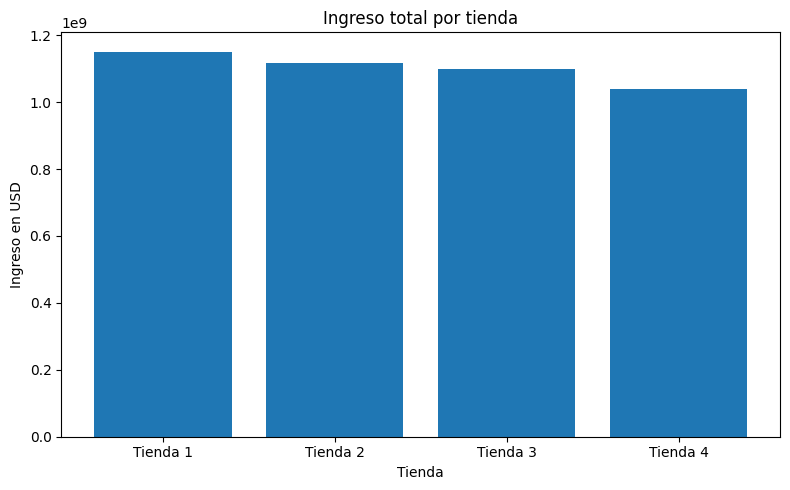

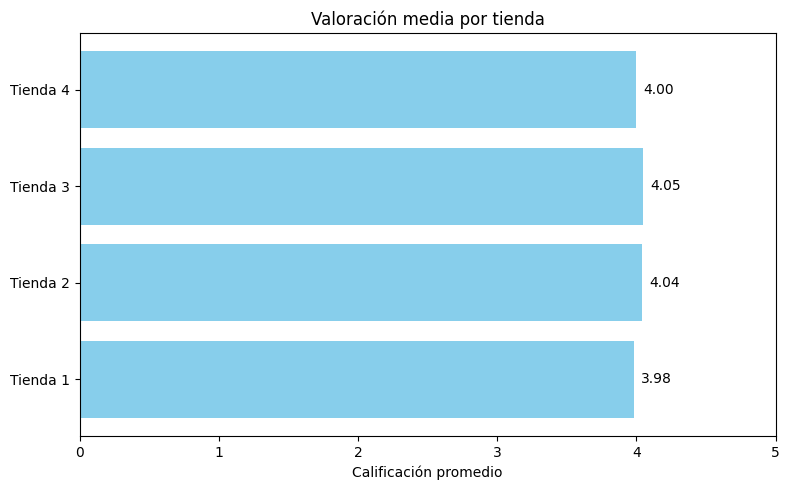

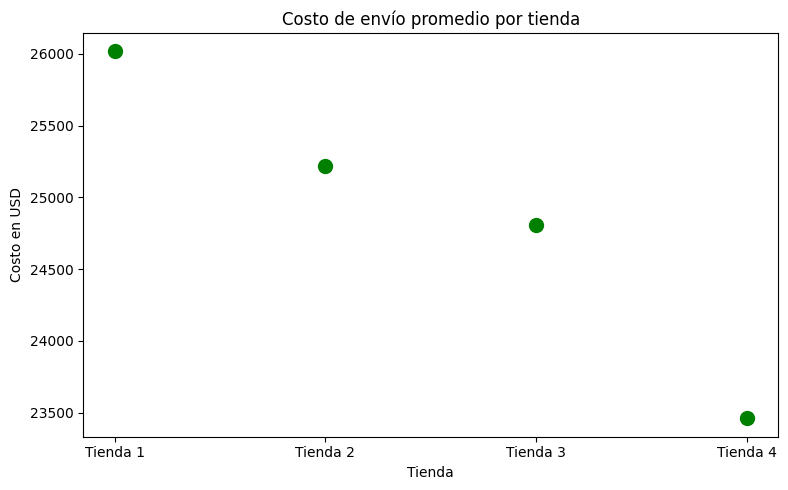

In [18]:
# GRÁFICO 1: Ingresos por tienda (barras)
plt.figure(figsize=(8, 5))
plt.bar(ingresos.keys(), ingresos.values())
plt.title('Ingreso total por tienda')
plt.ylabel('Ingreso en USD')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()

# GRÁFICO 2: Valoración media por tienda (barras horizontales)
plt.figure(figsize=(8, 5))
plt.barh(list(calificaciones.keys()), list(calificaciones.values()), color="skyblue")
plt.title("Valoración media por tienda")
plt.xlabel("Calificación promedio")
plt.xlim(0, 5)  # rango de 0 a 5 estrellas

# Etiquetas de valor a la derecha de cada barra
for i, valor in enumerate(calificaciones.values()):
    plt.text(valor + 0.05, i, f"{valor:.2f}", va="center")

plt.tight_layout()
plt.show()

# GRÁFICO 3: Costo de envío promedio por tienda (dispersión)
plt.figure(figsize=(8, 5))

# Convertir claves a índices
tiendas = list(costos_envio.keys())
valores = list(costos_envio.values())
x_pos = list(range(len(tiendas)))

plt.scatter(x_pos, valores, s=100, color='green')
plt.title('Costo de envío promedio por tienda')
plt.ylabel('Costo en USD')
plt.xlabel('Tienda')
plt.xticks(x_pos, tiendas)
plt.tight_layout()
plt.show()

# Informe Final – Evaluación de Tiendas Alura Store

Este documento busca orientar al Sr. Juan sobre **qué tienda vender** para liberar capital e invertir en un nuevo proyecto. Se analizaron cuatro tiendas considerando cinco frentes clave:

- **Ingresos totales anuales**
- **Categorías más y menos vendidas**
- **Calificaciones promedio de clientes**
- **Productos con mayor y menor rotación**
- **Costo promedio de envío**

La información fue procesada en Python y comparada con visualizaciones, permitiendo un análisis objetivo del desempeño por tienda.

---

## 1) Ingresos totales por tienda

La **Tienda 1** lidera la facturación con **1.150.880.400**, seguida de la Tienda 2 y la Tienda 3. La **Tienda 4** registra el ingreso más bajo con **1.038.375.700**.

**Ranking por ingresos:**
1. Tienda 1 — 1.150.880.400

2. Tienda 2 — 1.116.343.500

3. Tienda 3 — 1.098.019.600

4. Tienda 4 — 1.038.375.700

---

## 2) Calificaciones promedio de clientes

La satisfacción de clientes pone a la **Tienda 3** en primer lugar con **4.05**. La **Tienda 1** obtiene la valoración más baja con **3.98**.

**Ranking por calificación:**

1. Tienda 3 — 4.05
2. Tienda 2 — 4.04
3. Tienda 4 — 4.00
4. Tienda 1 — 3.98

---

## 3) Costo promedio de envío (menor es mejor)

El costo logístico favorece a la **Tienda 4** con **23.459**, mientras que la **Tienda 1** es la más costosa con **26.019**.

**Ranking por costo de envío:**
1. Tienda 4 — 23.459
2. Tienda 3 — 24.806
3. Tienda 2 — 25.216
4. Tienda 1 — 26.019

---

## 4) Categorías de productos más vendidas

A nivel general, **Muebles** encabeza ventas, seguida por **Electrónicos** y **Juguetes**.

- **Tienda 3** sobresale con los mayores volúmenes en las dos categorías principales: *Muebles: 499 ventas*, *Electrónicos: 451 ventas*.
- **Tienda 4**, a pesar de cerrar la lista en ingresos, mantiene volúmenes competitivos en estas categorías.

---

## 5) Productos con mayor y menor rotación

**Tienda 1**
- Más vendido: *Microondas* (60)
- Menos vendido: *Celular ABXY* (33)

**Tienda 2**
- Más vendido: *Iniciando en programación* (65)
- Menos vendido: *Juego de mesa* (32)

**Tienda 3**
- Más vendido: *Kit de bancas* (57)
- Menos vendido: *Bloques de construcción* (35)

**Tienda 4**
- Más vendido: *Cama box* (62)
- Menos vendido: *Guitarra eléctrica* (33)

> Nota: La **Tienda 4** posee un producto “estrella” (Cama box), pero no compensa el menor rendimiento del resto del portafolio.

---

## Conclusión y recomendación

Integrando resultados, **la Tienda 4** presenta el desempeño global más débil:
- **Menor facturación anual**
- **Calificación promedio aceptable (4.00), pero no sobresaliente**
- **Ventaja en costos de envío** que no se traduce en mayores ventas

**Recomendación:** El Sr. Juan debería **vender la Tienda 4**. Aun con un costo de envío competitivo, la tienda no muestra ventajas claras en satisfacción ni en diversificación que respalden un crecimiento sostenido frente a las demás.
